# Tantangan: Menganalisis Teks tentang Ilmu Data

> *Dalam notebook ini, kita bereksperimen menggunakan URL berbeda - artikel Wikipedia tentang Pembelajaran Mesin. Anda dapat melihat bahwa, tidak seperti Ilmu Data, artikel ini mengandung banyak istilah, sehingga membuat analisis menjadi lebih rumit. Kita perlu menemukan cara lain untuk membersihkan data setelah melakukan ekstraksi kata kunci, untuk menghilangkan beberapa kombinasi kata yang sering muncul tetapi tidak bermakna.*

Dalam contoh ini, mari kita lakukan latihan sederhana yang mencakup semua langkah dalam proses tradisional ilmu data. Anda tidak perlu menulis kode apa pun, cukup klik pada sel di bawah untuk menjalankannya dan amati hasilnya. Sebagai tantangan, Anda didorong untuk mencoba kode ini dengan data yang berbeda.

## Tujuan

Dalam pelajaran ini, kita telah membahas berbagai konsep yang terkait dengan Ilmu Data. Mari kita coba menemukan lebih banyak konsep terkait dengan melakukan **penambangan teks**. Kita akan mulai dengan teks tentang Ilmu Data, mengekstraksi kata kunci darinya, dan kemudian mencoba memvisualisasikan hasilnya.

Sebagai teks, saya akan menggunakan halaman tentang Ilmu Data dari Wikipedia:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Langkah 1: Mendapatkan Data

Langkah pertama dalam setiap proses ilmu data adalah mendapatkan data. Kita akan menggunakan pustaka `requests` untuk melakukannya:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Langkah 2: Mengubah Data

Langkah berikutnya adalah mengonversi data ke dalam bentuk yang sesuai untuk diproses. Dalam kasus kita, kita telah mengunduh kode sumber HTML dari halaman, dan kita perlu mengubahnya menjadi teks biasa.

Ada banyak cara untuk melakukan ini. Kita akan menggunakan objek [HTMLParser](https://docs.python.org/3/library/html.parser.html) bawaan Python yang paling sederhana. Kita perlu membuat subclass dari kelas `HTMLParser` dan mendefinisikan kode yang akan mengumpulkan semua teks di dalam tag HTML, kecuali tag `<script>` dan `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Langkah 3: Mendapatkan Wawasan

Langkah paling penting adalah mengubah data kita menjadi bentuk yang dapat memberikan wawasan. Dalam kasus kita, kita ingin mengekstrak kata kunci dari teks, dan melihat kata kunci mana yang lebih bermakna.

Kita akan menggunakan pustaka Python bernama [RAKE](https://github.com/aneesha/RAKE) untuk ekstraksi kata kunci. Pertama, mari kita instal pustaka ini jika belum tersedia:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Fungsi utama tersedia dari objek `Rake`, yang dapat kita sesuaikan menggunakan beberapa parameter. Dalam kasus kita, kita akan mengatur panjang minimum sebuah kata kunci menjadi 5 karakter, frekuensi minimum sebuah kata kunci dalam dokumen menjadi 3, dan jumlah maksimum kata dalam sebuah kata kunci menjadi 2. Jangan ragu untuk mencoba nilai lainnya dan amati hasilnya.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Kami memperoleh daftar istilah beserta tingkat kepentingannya. Seperti yang dapat Anda lihat, disiplin ilmu yang paling relevan, seperti machine learning dan big data, berada di posisi teratas dalam daftar.

## Langkah 4: Memvisualisasikan Hasil

Orang-orang biasanya dapat memahami data dengan lebih baik dalam bentuk visual. Oleh karena itu, sering kali masuk akal untuk memvisualisasikan data guna mendapatkan wawasan. Kita dapat menggunakan pustaka `matplotlib` di Python untuk membuat plot distribusi sederhana dari kata kunci beserta relevansinya:


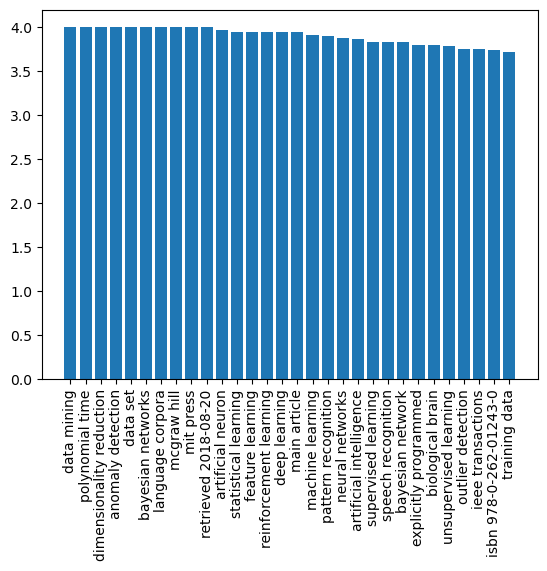

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Namun, ada cara yang lebih baik untuk memvisualisasikan frekuensi kata - menggunakan **Word Cloud**. Kita perlu menginstal pustaka lain untuk membuat word cloud dari daftar kata kunci kita.


In [71]:
!{sys.executable} -m pip install wordcloud

Objek `WordCloud` bertanggung jawab untuk menerima teks asli, atau daftar kata yang telah dihitung sebelumnya beserta frekuensinya, dan mengembalikan gambar, yang kemudian dapat ditampilkan menggunakan `matplotlib`:


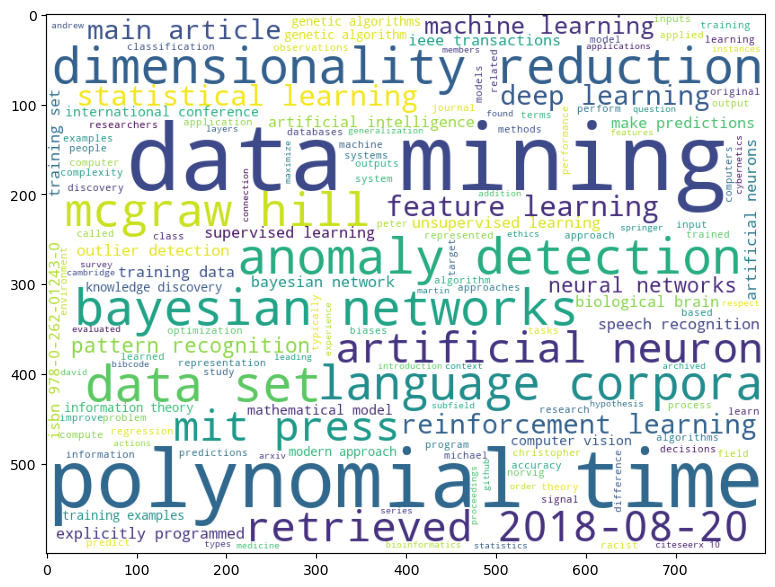

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Kita juga dapat memasukkan teks asli ke `WordCloud` - mari kita lihat apakah kita dapat memperoleh hasil yang serupa:


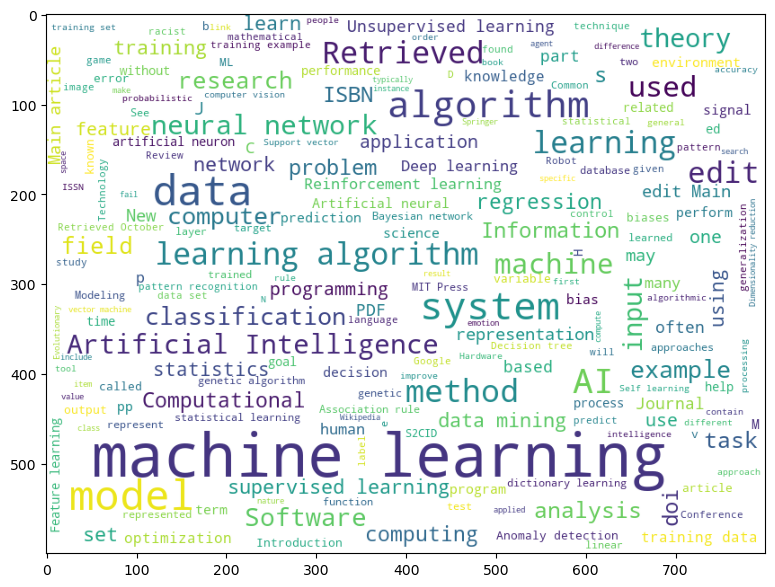

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Anda dapat melihat bahwa word cloud sekarang terlihat lebih menarik, tetapi juga mengandung banyak "noise" (misalnya, kata-kata yang tidak relevan seperti `Retrieved on`). Selain itu, kita mendapatkan lebih sedikit kata kunci yang terdiri dari dua kata, seperti *data scientist* atau *computer science*. Hal ini karena algoritma RAKE melakukan pekerjaan yang jauh lebih baik dalam memilih kata kunci yang relevan dari teks. Contoh ini menggambarkan pentingnya pra-pemrosesan dan pembersihan data, karena gambaran yang jelas pada akhirnya akan memungkinkan kita membuat keputusan yang lebih baik.

Dalam latihan ini, kita telah melalui proses sederhana untuk mengekstrak makna dari teks Wikipedia, dalam bentuk kata kunci dan word cloud. Contoh ini cukup sederhana, tetapi dengan baik menunjukkan semua langkah tipikal yang akan diambil seorang data scientist saat bekerja dengan data, mulai dari akuisisi data hingga visualisasi.

Dalam kursus kita, kita akan membahas semua langkah tersebut secara mendetail.



---

**Penafian**:  
Dokumen ini telah diterjemahkan menggunakan layanan penerjemahan AI [Co-op Translator](https://github.com/Azure/co-op-translator). Meskipun kami berusaha untuk memberikan hasil yang akurat, harap diingat bahwa terjemahan otomatis mungkin mengandung kesalahan atau ketidakakuratan. Dokumen asli dalam bahasa aslinya harus dianggap sebagai sumber yang otoritatif. Untuk informasi yang bersifat kritis, disarankan menggunakan jasa penerjemahan profesional oleh manusia. Kami tidak bertanggung jawab atas kesalahpahaman atau penafsiran yang keliru yang timbul dari penggunaan terjemahan ini.
